In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv("Clear Dataframe.csv")

In [3]:
df['ДАТА'] = pd.to_datetime(df['ДАТА'])

In [4]:
df

,ДАТА,ВРЕМЯ ДОСТАВКИ,ЗАКАЗ,ИМЯ,ИТОГ,КОММЕНТАРИЙ
0,2021-05-28,21:00-23:00,1) связка шаров 12 штук (хром как на фото) \n2...,Мария,4850,Позвонить на моб. перед домофоном
1,2021-06-02,8:00,"1) Колонны на вход (ярко зеленый, бирюза, тифф...",Аня,15490,Манифик Manifik (ОТМЕНА ЗАКАЗА ИЗ ЗА КОВИДА)
2,2021-06-12,20:30,1) 2 связки шаров состоящие из:\n-3 диско шаро...,Мария,7240,Парковку не стал учитывать
3,2021-06-14,9:00-12:00,1) 2 связки шаров состоящие из:\n-6 звёзд (зол...,Ирина,4100,NaN
4,2021-06-14,19:00-22:00,1) связка шаров:\n-10 обычных (белые и фуксия ...,Марьям,6500,NaN
...,...,...,...,...,...,...
239,2022-07-27,9:00-10:00,1) 2 связки шаров из:\n- 8 оранжевых\n- 6 чёрн...,Злата,14500,Итог: 15480₽ (для Вас со скидкой 14500₽)
240,2022-07-27,16:00,2 связки:\n- 10 шариков (розовые и голубые)\n-...,Марьям,5260,NaN
241,2022-08-01,11:00,"1) 2 цифры (розовое золото) - ""25""\n\n2) фигур...",Нигина,25000,ИТОГ: 26510 руб (со скидкой 25000 руб)
242,2022-08-08,23:00,1) фигура «Белая голова кошечки с короной»\n\n...,Наталья,5750,Итог: 6250₽ (со скидкой 5750₽)


In [5]:
names = df['ИМЯ'].value_counts().head(10) #Выделим 10 разных имен, которые наиболее часто делали заказы за всё время

In [6]:
names

Екатерина    21
Марьям       12
Ольга        12
Анастасия    12
Мария        11
Татьяна      11
Юлия         10
Ирина         8
Анна          8
Елизавета     6
Name: ИМЯ, dtype: int64

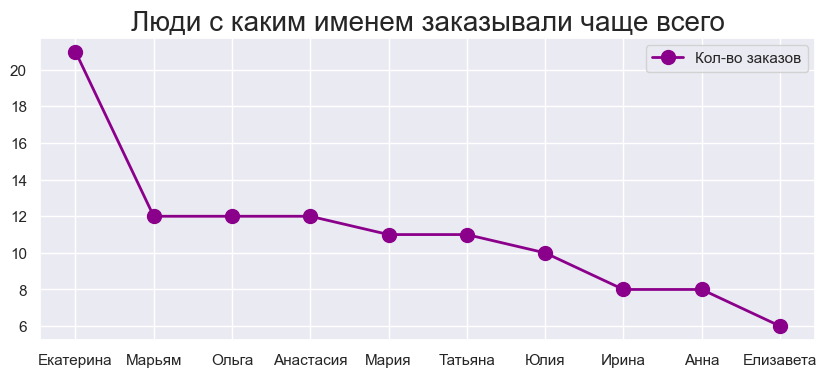

In [7]:
#Построим график на основе этих данных

fig = plt.figure(figsize = (10,4), dpi=100)
sns.set(style='darkgrid')
plt.plot(names, color="#8B008B", lw = 2, marker='o',ms=10, label="Кол-во заказов")
plt.legend()
plt.title('Люди с каким именем заказывали чаще всего', size = 20)

plt.show()

In [8]:
topnames = df.groupby('ИМЯ').sum().sort_values(by='ИТОГ', ascending=False).head(10) #СОЗДАДИМ НОВЫЙ ДАТАФРЕЙМ

In [9]:
topnames #ЛЮДИ С КАКИМ ИМЕНЕМ ЗАКАЗАЛИ НА БОЛЬШУЮ СУММУ ДЕНЕГ

,ИТОГ
ИМЯ,
Ольга,108350
Ирина,105815
Екатерина,103310
Мария,100655
Марьям,84930
Мария,82900
Татьяна,67825
Юлия,64005
Анастасия,59025


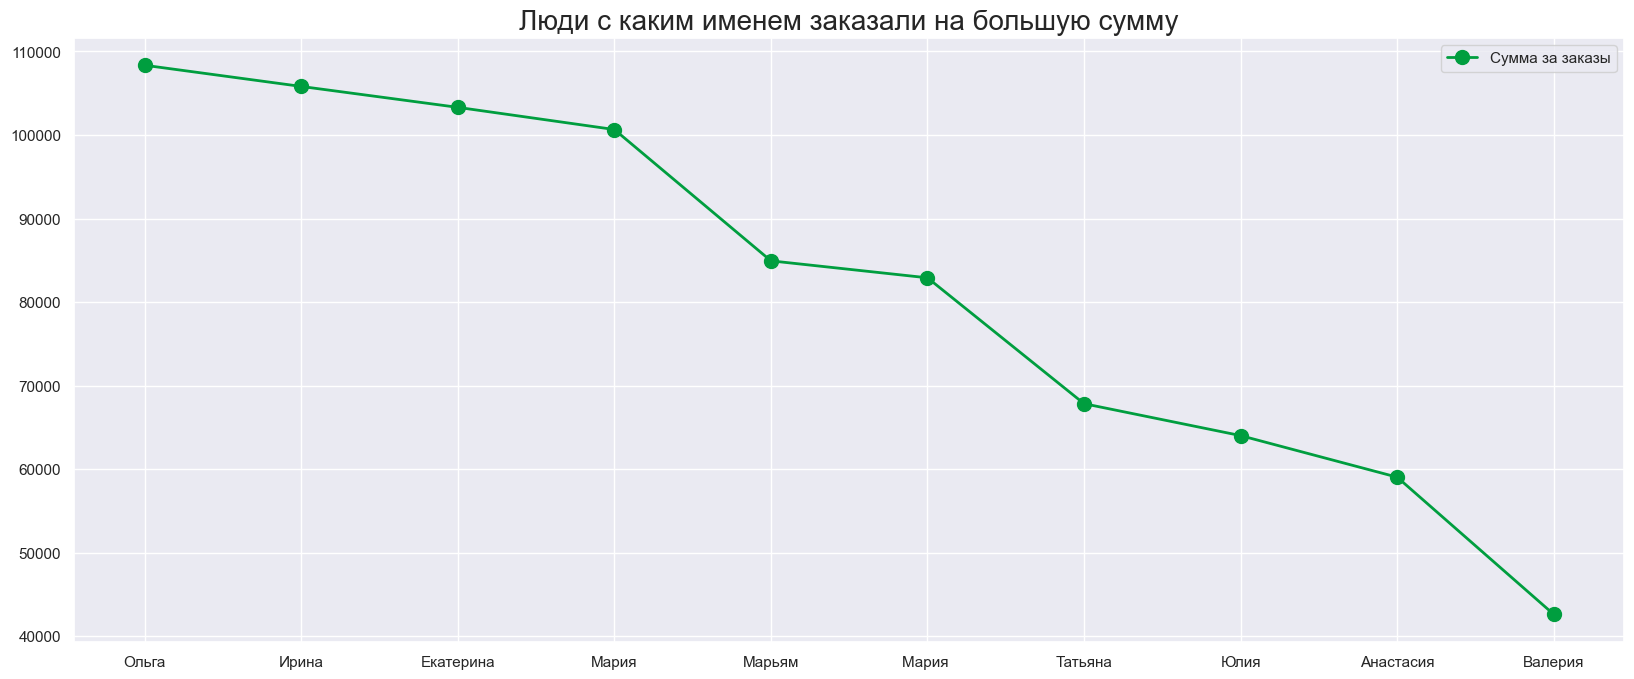

In [10]:
#Построим график на основе этих данных

fig = plt.figure(figsize = (20,8), dpi=100)

sns.set(style='darkgrid')
plt.plot(topnames, color="#009e3f", lw = 2, marker='o',ms=10, label="Сумма за заказы")
plt.legend()
plt.title('Люди с каким именем заказали на большую сумму', size = 20)

plt.show()

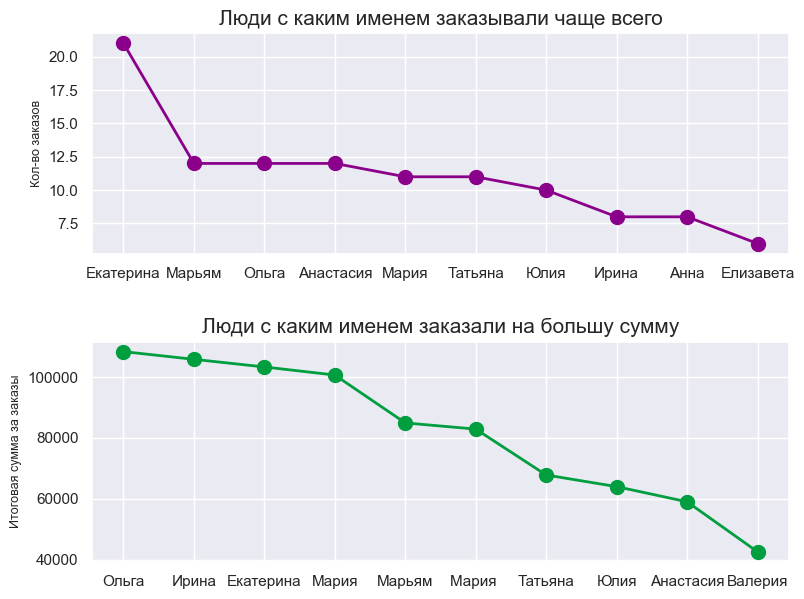

In [11]:
#ПОПРОБУЕМ РАСПОЛОЖИТЬ ОБА ГРАФИКА РЯДОМ

fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (9,7), dpi=100)

axes[0].plot(names, color="#8B008B", lw = 2, marker='o',ms=10, label="Кол-во заказов")
axes[0].set_title('Люди с каким именем заказывали чаще всего', size = 15)
axes[0].set_ylabel('Кол-во заказов', size = 9)

axes[1].plot(topnames, color="#009e3f", lw = 2, marker='o',ms=10, label="Сумма за заказы")
axes[1].set_title('Люди с каким именем заказали на большу сумму', size = 15)
axes[1].set_ylabel('Итоговая сумма за заказы', size = 9)

fig.subplots_adjust(hspace=0.4)
plt.show()

In [12]:
#ПРОСУММИРУЕМ ВСЕ ПРОДАЖИ ПО МЕСЯЦАМ И ПОСТРОИМ ГРАФИК

In [13]:
newdf = df.set_index('ДАТА').resample('M')["ИТОГ"].sum()

In [14]:
newdf

ДАТА
2021-05-31      4850
2021-06-30     70435
2021-07-31    108360
2021-08-31    101595
2021-09-30    118075
2021-10-31    160330
2021-11-30    111180
2021-12-31    125455
2022-01-31     56785
2022-02-28    189971
2022-03-31     99420
2022-04-30     48434
2022-05-31    177980
2022-06-30    116060
2022-07-31    210105
2022-08-31     35140
Name: ИТОГ, dtype: int64

<AxesSubplot:xlabel='ДАТА'>

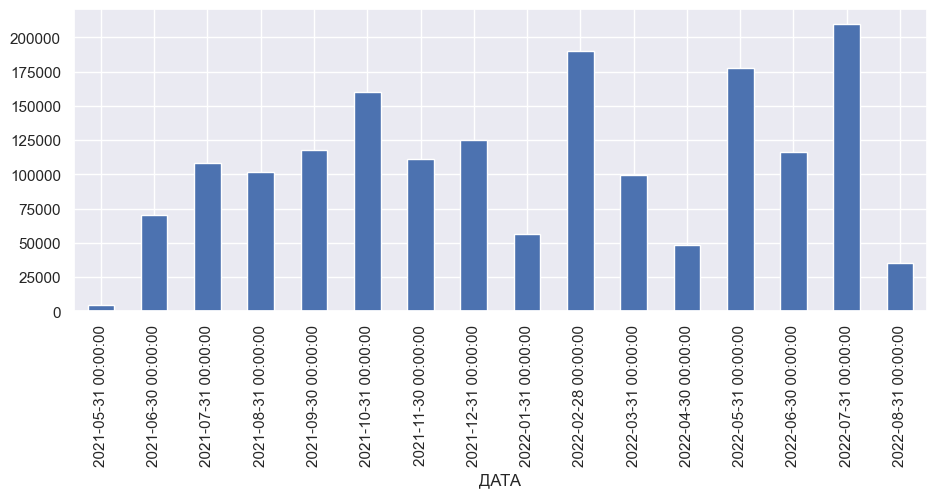

In [15]:
plt.figure(figsize=(11,4),dpi=100)
newdf.plot(kind='bar')

In [17]:
#ПРОБУЮ ЕЩЕ ОДИН СПОСОБ
df2 = pd.read_csv("Clear Dataframe.csv")

In [18]:
df2['ГОД-МЕСЯЦ'] = df2['ДАТА'].str.slice(0, 7)

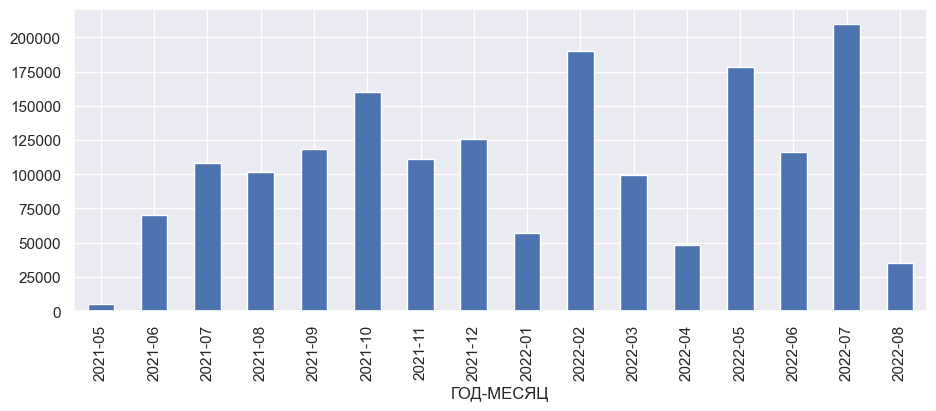

In [19]:
plt.figure(figsize = (11,4), dpi = 100)

df2.groupby('ГОД-МЕСЯЦ')['ИТОГ'].sum().plot(kind='bar')

plt.show()

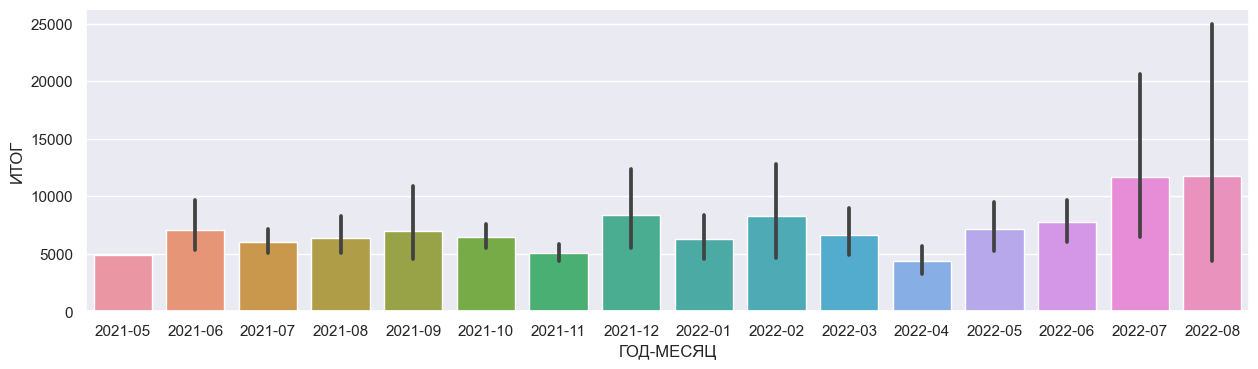

In [38]:
plt.figure(figsize = (15,4), dpi = 100)

sns.barplot(x='ГОД-МЕСЯЦ', y='ИТОГ', data=df2)

plt.show()